In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [2]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


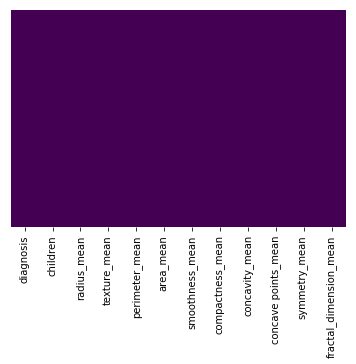

In [3]:
sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [4]:
sns.set()
plt.rcParams["patch.force_edgecolor"] = True

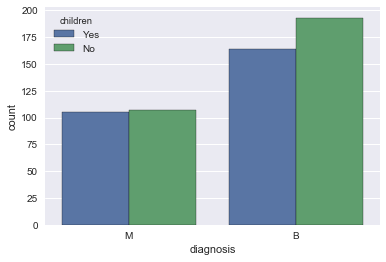

In [5]:
sns.countplot(x = 'diagnosis', hue = 'children', data = cancer_data)


In [6]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)

In [7]:
cancer_data = pd.concat([cancer_data, children], axis = 1)

In [8]:
cancer_data = cancer_data.iloc[:,[0,2,3,6,7,8,9,10,11]]
cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# Model Logistic Regression Testing

In [9]:
X = cancer_data.iloc[:, 1:].values
y = cancer_data.iloc[:,0].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
#Fiting Logistic Regression to the Training Set#Fiting 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


             precision    recall  f1-score   support

          B       0.91      0.97      0.94        76
          M       0.97      0.90      0.93        67

avg / total       0.94      0.94      0.94       143



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[74  2]
 [ 7 60]]


In [15]:
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 93.71%


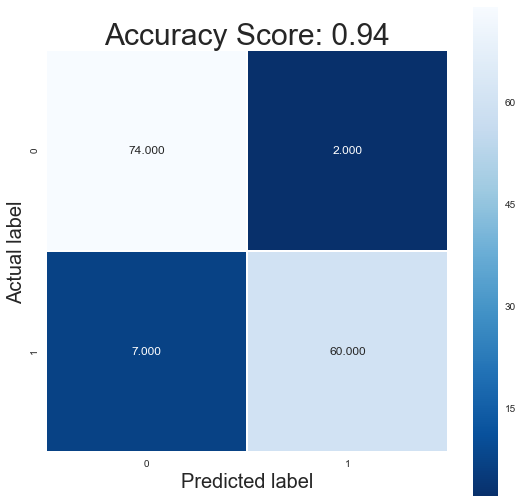

In [16]:
score = classifier.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 20);
plt.xlabel('Predicted label', size = 20);
all_sample_title = 'Accuracy Score: {}'.format(round(score, 2))
plt.title(all_sample_title, size = 30);

### Optimization

In [23]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.grid_search import GridSearchCV

In [22]:
LR_params = {'C':[0.001, 0.1, 1, 10, 100, 1000]}

kfold = KFold(len(X_train), n_folds= 5, shuffle=True)
model_grid = GridSearchCV(LogisticRegression(), LR_params)
model_grid.fit(X_train, y_train)
print("Best C values: ", model_grid.best_params_)
print()
model_grid.best_estimator_
grid_predictions = model_grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

cv_results = cross_val_score(model_grid, X_train, y_train, cv = kfold, scoring='accuracy')
msg = "Cross Validation Accuracy Logistic Regression: Accuracy : %f with sd: %f" % (cv_results.mean(), cv_results.std())
print(msg)

Best C values:  {'C': 0.1}

[[75  1]
 [ 9 58]]
             precision    recall  f1-score   support

          B       0.89      0.99      0.94        76
          M       0.98      0.87      0.92        67

avg / total       0.94      0.93      0.93       143

Cross Validation Accuracy Logistic Regression: Accuracy : 0.931902 with sd: 0.008953
